# SIMULATION OF A MULTIPLE SERVER QEUEING SYSTEM USING PYTHON AND JUPYTER NOTEBOOK

## importing the data

In [41]:
import pandas as pd 
import time
from datetime import datetime
from pandas import ExcelWriter 
from pandas import ExcelFile
import datetime as dt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_excel("data/Single Server Queue System.xlsm")
Inter_arrivaltime = pd.read_csv("data/interarrival_Time.txt")
Servicetime = pd.read_csv("data/ServiceTime.txt")
csv_data = pd.read_csv("data/Single_SQS.csv")
row_data = pd.read_csv('data/Single_SQS_Rowdata.csv')

In [4]:
row_data.columns

Index(['Customer', 'Arrival_Time', 'Start_Service_Time', 'End_Service_Time',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [5]:
row_data.drop(columns = ['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], inplace = True )


In [6]:
 df = row_data.dropna(how = 'all')

In [7]:
csv_data.set_index('Customer' , inplace = True)

In [8]:
csv_data

,Interarrival,Arrival_Time,Start_Service_Time,End_Service_Time,Queue_Waiting_Time,Service_Time,Total_Time_in_the_System,Idle_Time_of_Server
Customer,,,,,,,,
1,0.000000,08:31:00,08:31:00,08:33:25,0.000000,0.001678,0.001678,0.000000
2,0.000266,08:31:23,08:33:30,08:33:47,0.001470,0.000197,0.001667,0.000058
3,0.001817,08:34:00,08:34:45,08:36:00,0.000521,0.000868,0.001389,0.000671
4,0.002373,08:37:25,08:38:00,08:39:40,0.000405,0.001157,0.001563,0.001389
5,0.000104,08:37:34,08:39:44,08:40:20,0.001505,0.000417,0.001921,0.000046
6,0.001076,08:39:07,08:40:23,08:40:47,0.000880,0.000278,0.001157,0.000035
7,0.002731,08:43:03,08:43:07,08:45:00,0.000046,0.001308,0.001354,0.001620
8,0.000660,08:44:00,08:44:30,08:46:12,0.000347,0.001181,0.001528,0.000000
9,0.007639,08:55:00,08:55:10,08:56:00,0.000116,0.000579,0.000694,0.006227


In [47]:
csv_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Interarrival,150,NaN,NaN,NaN,0.00058324,0.000979974,0,5.8e-05,0.000174,0.00069125,0.007639
Arrival_Time,150,148,09:27:31,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start_Service_Time,150,150,09:04:39,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Service_Time,150,150,09:53:25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Queue_Waiting_Time,150,NaN,NaN,NaN,0.000562053,0.000459589,0,0.000153,0.0004455,0.000868,0.001921
Service_Time,150,NaN,NaN,NaN,0.00026904,0.000267815,2.3e-05,8.4e-05,0.000197,0.000333,0.001678
Total_Time_in_the_System,150,NaN,NaN,NaN,0.000831107,0.000502845,9.3e-05,0.00041975,0.000764,0.001157,0.002338
Idle_Time_of_Server,150,NaN,NaN,NaN,0.000328507,0.000785378,0,1.2e-05,4.6e-05,0.000162,0.006227


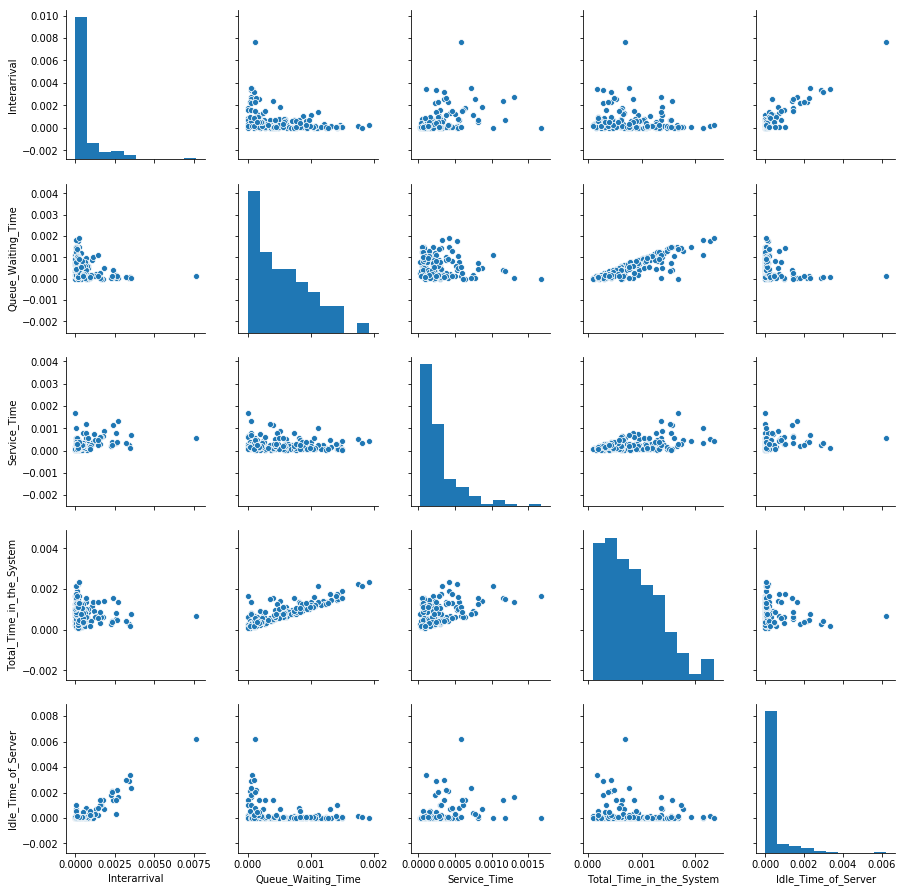

In [48]:
sns.pairplot(csv_data)

In [11]:
csv_data.dropna(how = 'all', inplace = True)

In [12]:
csv_data.head(4)

,Interarrival,Arrival_Time,Start_Service_Time,End_Service_Time,Queue_Waiting_Time,Service_Time,Total_Time_in_the_System,Idle_Time_of_Server
Customer,,,,,,,,
1,0.000000,08:31:00,08:31:00,08:33:25,0.000000,0.001678,0.001678,0.000000
2,0.000266,08:31:23,08:33:30,08:33:47,0.001470,0.000197,0.001667,0.000058
3,0.001817,08:34:00,08:34:45,08:36:00,0.000521,0.000868,0.001389,0.000671
4,0.002373,08:37:25,08:38:00,08:39:40,0.000405,0.001157,0.001563,0.001389


In [13]:
csv_data.Start_Service_Time = pd.to_datetime(csv_data.Start_Service_Time)
csv_data.End_Service_Time = pd.to_datetime(csv_data.End_Service_Time)
csv_data.Arrival_Time = pd.to_datetime(csv_data.Arrival_Time)

In [14]:
a = type(csv_data.Arrival_Time[1])
b= type(csv_data.Start_Service_Time[1])
c = type(csv_data.End_Service_Time[1])
print(a,b,c)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
csv_data.End_Service_Time = csv_data.End_Service_Time.dt.time

In [16]:
csv_data.Start_Service_Time = csv_data.Start_Service_Time.dt.time
csv_data.Arrival_Time =csv_data.Arrival_Time.dt.time
#csv_data.End_Service_Time = csv_data.End_Service_Time.dt.time


In [17]:
#csv_data.Start_Service_Time

In [95]:
#csv_data.Start_Service_Time = pd.to_datetime(csv_data.Start_Service_Time, format='%X')

## Interarrival time in detail

In [62]:
# converting the column to minutes
(csv_data['Interarrival']*1440).describe()

count    150.000000
mean       0.839866
std        1.411162
min        0.000000
25%        0.083520
50%        0.250560
75%        0.995400
max       11.000160
Name: Interarrival, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


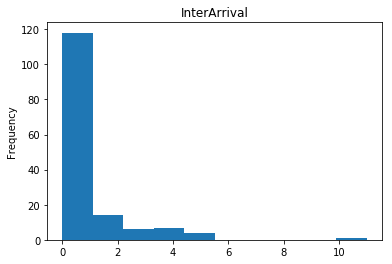

In [63]:
print((csv_data['Interarrival']*1440).plot.hist(title = 'InterArrival in Minutes'))

In [61]:
#converting interaarival colum to mniutes 
csv_data['Interarrival_in_mins'] = csv_data['Interarrival']*1440
#csv_data['Interarrival_in_mins'].describ

In [70]:
(csv_data['Service_Time']*1440).describe(include='all')

count    150.000000
mean       0.387418
std        0.385654
min        0.033120
25%        0.120960
50%        0.283680
75%        0.479520
max        2.416320
Name: Service_Time, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


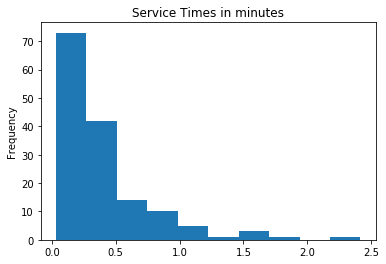

In [65]:
print((csv_data['Service_Time']*1440).plot.hist(title = 'Service Times in minutes'))

In [33]:
#csv_data.Arrival_Time.str.split(':').apply(lambda x: int(x[0]) *60 + int(x[1]))

 ### Other important calculations 

In [66]:
# Getting the data in Minutes 
Interarrival_in_minutes  = ((csv_data['Service_Time']*1440))

In [99]:
Average_Arrival_rates = Interarrival_in_minutes.count()/125.98

Average_Arrival_rates

1.190665184949992

58.11263999999996

In [98]:
#datetime.datetime.combine(datetime.date.today(), a)


In [75]:
csv_data.columns

Index(['Interarrival', 'Arrival_Time', 'Start_Service_Time',
       'End_Service_Time', 'Queue_Waiting_Time', 'Service_Time',
       'Total_Time_in_the_System', 'Idle_Time_of_Server',
       'Interarrival_in_mins'],
      dtype='object')